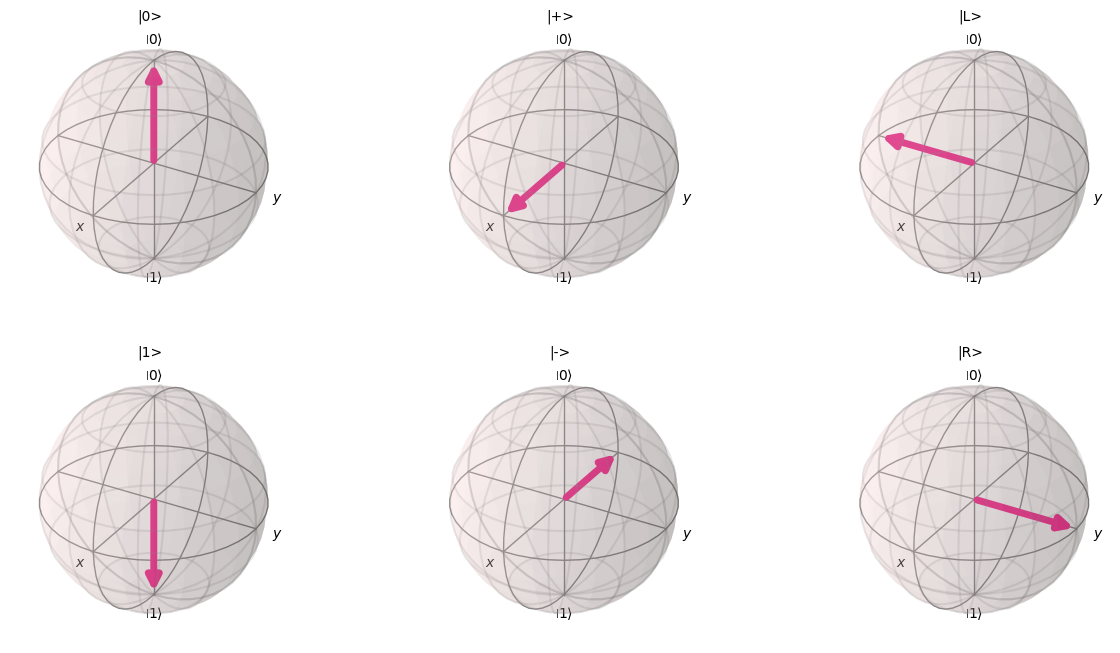

In [28]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_vector
import matplotlib.pyplot as plt


# Define the states as quantum circuits
def get_circuit(state):
    qc = QuantumCircuit(1)
    if state == '0':
        pass  # already in |0>
    elif state == '1':
        qc.x(0)  # apply X gate to get |1>
    elif state == '+':
        qc.h(0)  # apply H gate to get |+>
    elif state == '-':
        qc.x(0)  # apply X gate, then H gate to get |->
        qc.h(0)
    elif state == 'L':  # Left circular polarization (|0> + i|1>)/sqrt(2)
        qc.h(0)
        qc.s(0)
    elif state == 'R':  # Right circular polarization (|0> - i|1>)/sqrt(2)
        qc.h(0)
        qc.sdg(0)
    else:
        raise ValueError("Invalid state")
    return qc


states = ['0', '1', '+', '-', 'L', 'R']

# Create a subplot for each state
fig, axes = plt.subplots(2, 3, figsize=(15, 8), subplot_kw={'projection': '3d'})

for i, state in enumerate(states):
    qc = get_circuit(state)
    statevector = Statevector.from_instruction(qc)
    
    # Calculate the Bloch vector components
    bloch_vector = [
        2 * (statevector.data[0].real * statevector.data[1].real + statevector.data[0].imag * statevector.data[1].imag),
        2 * (statevector.data[0].imag * statevector.data[1].real - statevector.data[0].real * statevector.data[1].imag),
        (statevector.data[0].real**2 + statevector.data[0].imag**2) - (statevector.data[1].real**2 + statevector.data[1].imag**2)
    ]
    
    # Plot the Bloch vector
    plot_bloch_vector(bloch_vector, title=f"|{state}>", ax=axes[i%2, i//2])

plt.show()

